In [1]:
from pathlib import Path

from cycler import cycler
from matplotlib import ticker
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from drl_bis.utils import check_dir
import utils

In [2]:
check_dir('drl_bis/plots')

In [13]:
SAVEFIG: bool = True
FIG_PATH = Path('drl_bis/plots').resolve()
REW_PATH = Path('rl_trader_rewards').resolve()
CP_PATH = Path('rl_trader_cps').resolve()
R_FILENAME: str = 'test-tue_19_jan_2021_19h38_i20000_s80_bs32_e50'
R_BASELINE_FILENAME: str = 'dqn-tue_19_jan_2021_22h17_i20000_s80_bs32_e50_test'

In [4]:
plt.rc('axes', prop_cycle=utils.CYCLER)
plt.rc('font', size=12)
plt.rc('figure', figsize=(6.4, 4.8))

## Reward analysis

In [65]:
r = np.load(REW_PATH / f'{R_FILENAME}.npy')
r = np.insert(r, 0, 20_000)
r

array([20000.        , 19481.49858093, 19022.39002991, 19516.6991806 ,
       19516.6991806 , 19516.6991806 , 19516.6991806 , 19516.6991806 ,
       19516.6991806 , 19704.63876724, 19434.72986221, 19414.21885681,
       19667.99967957, 19516.6991806 , 19516.6991806 , 19516.6991806 ,
       19516.6991806 , 19489.7095108 , 20227.17854309, 19042.82892227,
       19340.35009384, 19516.6991806 , 19749.18935776, 19322.95929718,
       19333.42885971, 18844.6216774 , 19516.6991806 , 19102.8483963 ,
       19293.85907745, 19423.56879425, 19511.39038086, 19516.6991806 ,
       19627.47923279, 19516.6991806 , 19516.6991806 , 19605.88670731,
       19327.11793518, 19516.6991806 , 19516.6991806 , 18379.88929367,
       19240.13027954, 19449.61830902, 19516.6991806 , 19516.6991806 ,
       19516.6991806 , 19516.6991806 , 19516.6991806 , 19251.837883  ,
       19979.84046936, 19810.24041748, 19375.19924164])

In [66]:
r_norm = pd.Series(r, name='mean rewards normalized').pct_change().dropna()

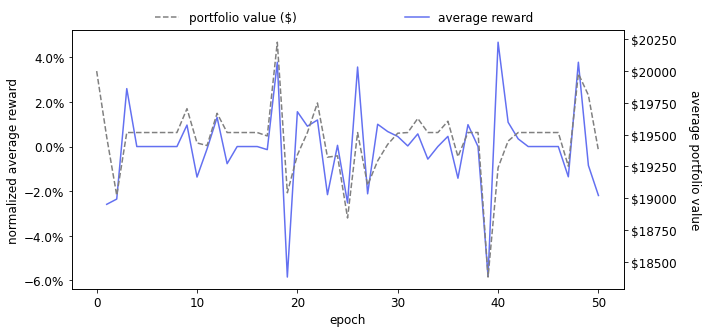

In [8]:
plt.figure(figsize=(10, 4.8))
plt.plot(r_norm * 100, label='average reward')
plt.ylabel('normalized average reward')
plt.xlabel('epoch')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.legend(loc='center', bbox_to_anchor=(0.72, 1.05), edgecolor='none')
ax_ = ax.twinx()
ax_.plot(r, c='gray', ls='--', label='portfolio value ($)')
formatter = ticker.FormatStrFormatter('$%1.0f')
ax_.yaxis.set_major_formatter(formatter)
ax_.set_ylabel('average portfolio value', rotation=-90, labelpad=25)
plt.legend(loc='center', bbox_to_anchor=(0.28, 1.05), edgecolor='none')
plt.tight_layout()
if SAVEFIG:
    plt.savefig(FIG_PATH / f'r-{R_FILENAME}.pdf', dpi=600, transparent=True)
plt.show()

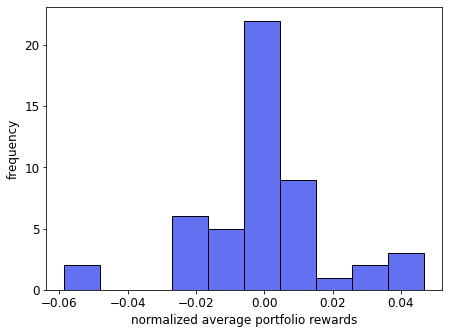

In [15]:
utils.plot_hist(r_norm, FIG_PATH, SAVEFIG, R_FILENAME)

In [47]:
r_rand = np.load(REW_PATH / f'{R_BASELINE_FILENAME}.npy')
r_rand = np.insert(r_rand, 0, 20_000)
r_rand

array([20000.        , 20420.28355026, 27197.90377426, 18914.82951736,
       19616.47556686, 25101.31350327, 27528.72450638, 23302.91700745,
       25755.96770096, 25525.40629196, 23139.88158417, 19816.03939438,
       19904.55706024, 23890.96475983, 24695.01408768, 23640.74766541,
       26182.1149025 , 20444.91596985, 23287.95404434, 23819.70440674,
       21910.02244186, 19394.25533295, 25706.36932373, 24044.83407211,
       24181.97087097, 25654.00915909, 21243.00805283, 24278.36536026,
       21984.2857933 , 26128.4200058 , 24849.43470764, 21581.53868866,
       23560.21626663, 25173.59491348, 21703.32564163, 25544.47786713,
       22484.39524078, 26463.31170654, 22457.55272675, 22996.05128479,
       25738.06406021, 25344.28234482, 20989.33084869, 24838.98597717,
       21068.63902664, 21262.95850372, 21953.66483307, 22080.56092834,
       23601.6533165 , 22688.44143295, 22291.97322083])

In [49]:
r_rand_norm = pd.Series(r_rand, name='mean rewards normalized').pct_change().dropna()

Figure successfully saved C:\Users\YBant\Documents\projects\drl_stock_trading_project\drl_bis\plots\dqn-tue_19_jan_2021_22h17_i20000_s80_bs32_e50_test_rand.pdf


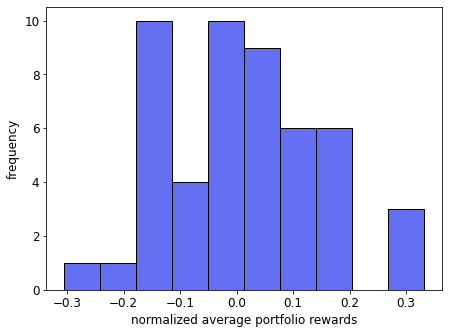

In [50]:
utils.plot_hist(r_rand_norm, FIG_PATH, SAVEFIG, f"{R_BASELINE_FILENAME}_rand")

Saved as C:\Users\YBant\Documents\projects\drl_stock_trading_project\drl_bis\plots\r-dqn-tue_19_jan_2021_22h17_i20000_s80_bs32_e50_test_rand.pdf


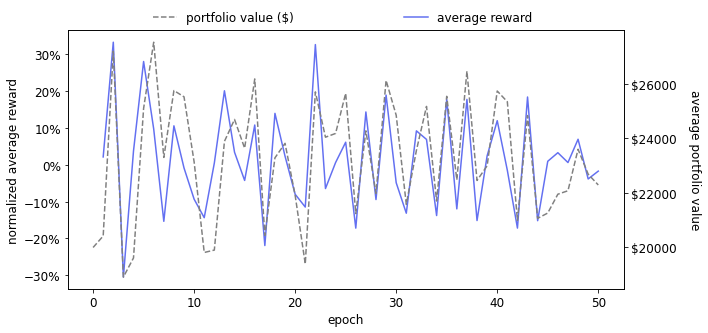

In [61]:
plt.figure(figsize=(10, 4.8))
plt.plot(r_rand_norm * 100, label='average reward')
plt.ylabel('normalized average reward')
plt.xlabel('epoch')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.legend(loc='center', bbox_to_anchor=(0.72, 1.05), edgecolor='none')
ax_ = ax.twinx()
ax_.plot(r_rand, c='gray', ls='--', label='portfolio value ($)')
formatter = ticker.FormatStrFormatter('$%1.0f')
ax_.yaxis.set_major_formatter(formatter)
ax_.set_ylabel('average portfolio value', rotation=-90, labelpad=25)
plt.legend(loc='center', bbox_to_anchor=(0.28, 1.05), edgecolor='none')
plt.tight_layout()
if SAVEFIG:
    plt.savefig(FIG_PATH / f'r-{R_BASELINE_FILENAME}_rand.pdf', dpi=600, transparent=True)
    print(f"Saved as {FIG_PATH / f'r-{R_BASELINE_FILENAME}_rand.pdf'}")
plt.show()

In [62]:
def sr(series):
    return series.mean() / series.std().mean()

In [67]:
sr(r_norm)

-0.022512299554912293

In [71]:
r_norm.mean()

-0.0004432295139227516

In [69]:
r_norm.std().mean()

0.01968832694508264

In [63]:
sr(r_rand_norm)

0.08333045732770752

In [72]:
r_rand_norm.mean()

0.011667515703031081

In [70]:
r_rand_norm.std().mean()

0.1400150206442178

## 2. Diversification analysis

In [16]:
DQN_CP_TEST_NAME = 'cps-dqn-tue_19_jan_2021_19h38_i20000_s80_bs32_e50'
DQN_STOCK_TEST_NAME = 'stocks_owned-dqn-tue_19_jan_2021_19h38_i20000_s80_bs32_e50'
RAND_CP_TEST_NAME = 'cps-dqn-tue_19_jan_2021_22h17_i20000_s80_bs32_e50_test'
RAND_STOCK_TEST_NAME = 'stocks_owned-dqn-tue_19_jan_2021_22h17_i20000_s80_bs32_e50_test'

DQN_CP_TRAIN_NAME = 'cps-dqn-tue_19_jan_2021_16h23_i20000_s80_bs32_e50'

In [17]:
cash_positions = np.load(CP_PATH / f'{DQN_CP_TEST_NAME}.npy')
stocks_owned = np.load(CP_PATH / f'{DQN_STOCK_TEST_NAME}.npy')
cash_positions_rand = np.load(CP_PATH / f'{RAND_CP_TEST_NAME}.npy')
stocks_owned_rand = np.load(CP_PATH / f'{RAND_STOCK_TEST_NAME}.npy')

### 2.1 DQN trader

In [18]:
cash_positions = pd.DataFrame(cash_positions, columns=('aapl', 'msci', 'sbux', 'bank account'))
cash_positions.head()

,aapl,msci,sbux,bank account
0,0,0,0,20000
1,0,0,0,20000
2,0,0,19958,41
3,0,0,19919,41
4,0,0,20085,41


Figure successfully saved C:\Users\YBant\Documents\projects\drl_stock_trading_project\drl_bis\plots\cps-dqn-tue_19_jan_2021_19h38_i20000_s80_bs32_e50.pdf


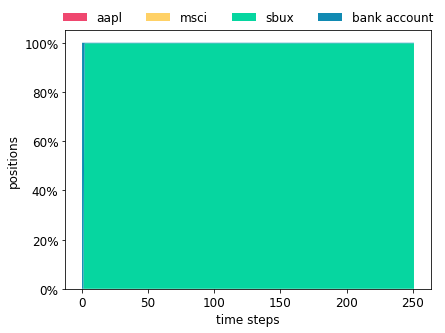

In [19]:
utils.plot_positions(cash_positions, fig_path=FIG_PATH, figname=DQN_CP_TEST_NAME, save=SAVEFIG)

In [20]:
cash_positions_train = np.load(CP_PATH / f'{DQN_CP_TRAIN_NAME}.npy')
cash_positions_train = pd.DataFrame(cash_positions_train, columns=('aapl', 'msci', 'sbux', 'bank account'))
cash_positions_train.head()

,aapl,msci,sbux,bank account
0,0,0,0,20000
1,0,0,19985,14
2,0,0,20028,14
3,0,0,19875,14
4,0,0,19775,14


Figure successfully saved C:\Users\YBant\Documents\projects\drl_stock_trading_project\drl_bis\plots\cps-dqn-tue_19_jan_2021_16h23_i20000_s80_bs32_e50.pdf


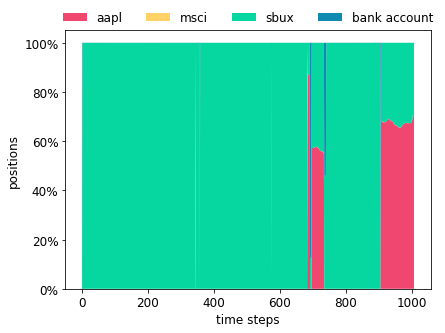

In [21]:
utils.plot_positions(cash_positions_train, fig_path=FIG_PATH, figname=DQN_CP_TRAIN_NAME, save=SAVEFIG)

### 2.2 Random trader

Figure successfully saved C:\Users\YBant\Documents\projects\drl_stock_trading_project\drl_bis\plots\cps-dqn-tue_19_jan_2021_22h17_i20000_s80_bs32_e50_test.pdf


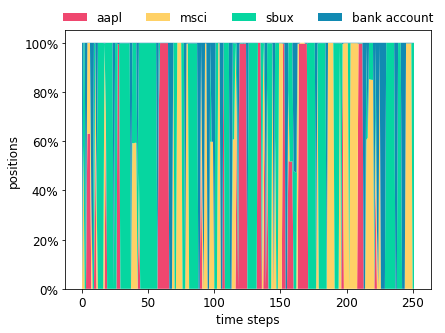

In [22]:
cash_positions_rand = pd.DataFrame(cash_positions_rand, columns=('aapl', 'msci', 'sbux', 'bank account'))
utils.plot_positions(cash_positions_rand, fig_path=FIG_PATH, figname=RAND_CP_TEST_NAME, save=SAVEFIG)

## 3. The dataset

In [24]:
stocks = utils.get_data(out_as='pandas')
stocks.head()

,AAPL,MSI,SBUX
0,67.854202,60.299999,28.184999
1,68.561401,60.900002,28.070000
2,66.842796,60.830002,28.129999
3,66.715599,60.810001,27.915001
4,66.655602,61.119999,27.775000


In [25]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1259 non-null   float32
 1   MSI     1259 non-null   float32
 2   SBUX    1259 non-null   float32
dtypes: float32(3)
memory usage: 14.9 KB


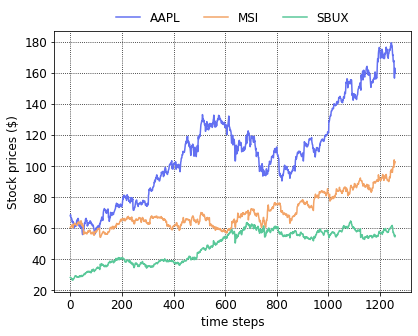

In [35]:
plt.rc('axes', prop_cycle=utils.CYCLER)
stocks.plot()
plt.ylabel('Stock prices ($)')
plt.xlabel('time steps')
plt.legend(loc='center', bbox_to_anchor=(0.5, 1.05), edgecolor='none', facecolor='none', ncol=3)
plt.grid(c='k', ls=':')
plt.savefig(FIG_PATH / 'aapl_msi_sbux.pdf', dpi=600, transparent=True)
plt.show()

### 3.1 Comparison

In [30]:
n_stocks = stocks.shape[1]
n_periods = stocks.shape[0]
eq_weights = np.repeat(1 / n_stocks, n_stocks)
eq_weights

array([0.33333333, 0.33333333, 0.33333333])

In [31]:
rets = stocks.pct_change().dropna()
eq_ptf = rets.mul(eq_weights, axis=1).sum(axis=1)

In [32]:
portfolio_value = cash_positions.sum(axis=1)
dqn_rets = portfolio_value.pct_change().dropna()
dqn_cum_rets = dqn_rets.add(1).cumprod()
dqn_cum_rets.shape

(251,)

In [41]:
rand_rets = cash_positions_rand.sum(axis=1).pct_change().dropna()
cum_rand_rets = rand_rets.add(1).cumprod()

In [42]:
start_idx: int = n_periods - len(dqn_cum_rets)
x = range(start_idx, n_periods)

[]

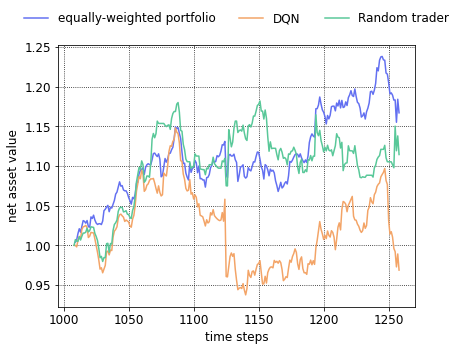

In [45]:
plt.plot(eq_ptf[start_idx:].add(1).cumprod(), label='equally-weighted portfolio')
plt.plot(x, dqn_cum_rets, label='DQN')
plt.plot(x, cum_rand_rets, label='Random trader')
# for ret in rets:
#     plt.plot(rets.loc[start_idx:, ret].add(1).cumprod(), label=ret)
plt.legend(loc='center', bbox_to_anchor=(0.5, 1.1), edgecolor='none', facecolor='none', ncol=3)
plt.grid(c='k', ls=':')
plt.tight_layout()
plt.ylabel('net asset value')
plt.xlabel('time steps')
plt.savefig(FIG_PATH / 'comparison_dqn_baseline.pdf', dpi=600, transparent=True)
plt.plot()

In [73]:
eq_ptf[start_idx:].mean()

0.000647788604100545

In [74]:
eq_ptf[start_idx:].std().mean()

0.007658824539447617

In [75]:
sr(eq_ptf[start_idx:])

0.08458068216134718

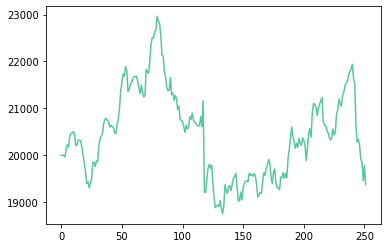

In [22]:
plt.plot(portfolio_value)
plt.show()

In [23]:
start = portfolio_value.index[0]
end = portfolio_value.index[-1]

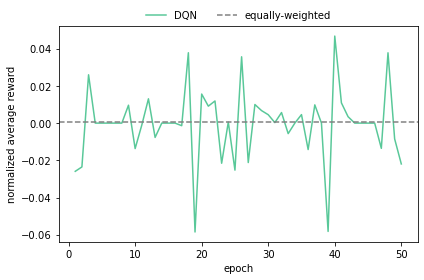

In [35]:
plt.plot(r_norm, label='DQN')
plt.axhline(eq_ptf.mean(), start, end, label='equally-weighted', c='gray', ls='--')
plt.ylabel('normalized average reward')
plt.xlabel('epoch')
plt.legend(**utils.LEGEND_PARAMS, ncol=2)
plt.tight_layout()
plt.show()